# Setup

In [23]:
import sys
import os
from pathlib import Path
from collections import defaultdict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from mcda.dataset import MCDADataset

# Number of alternatives

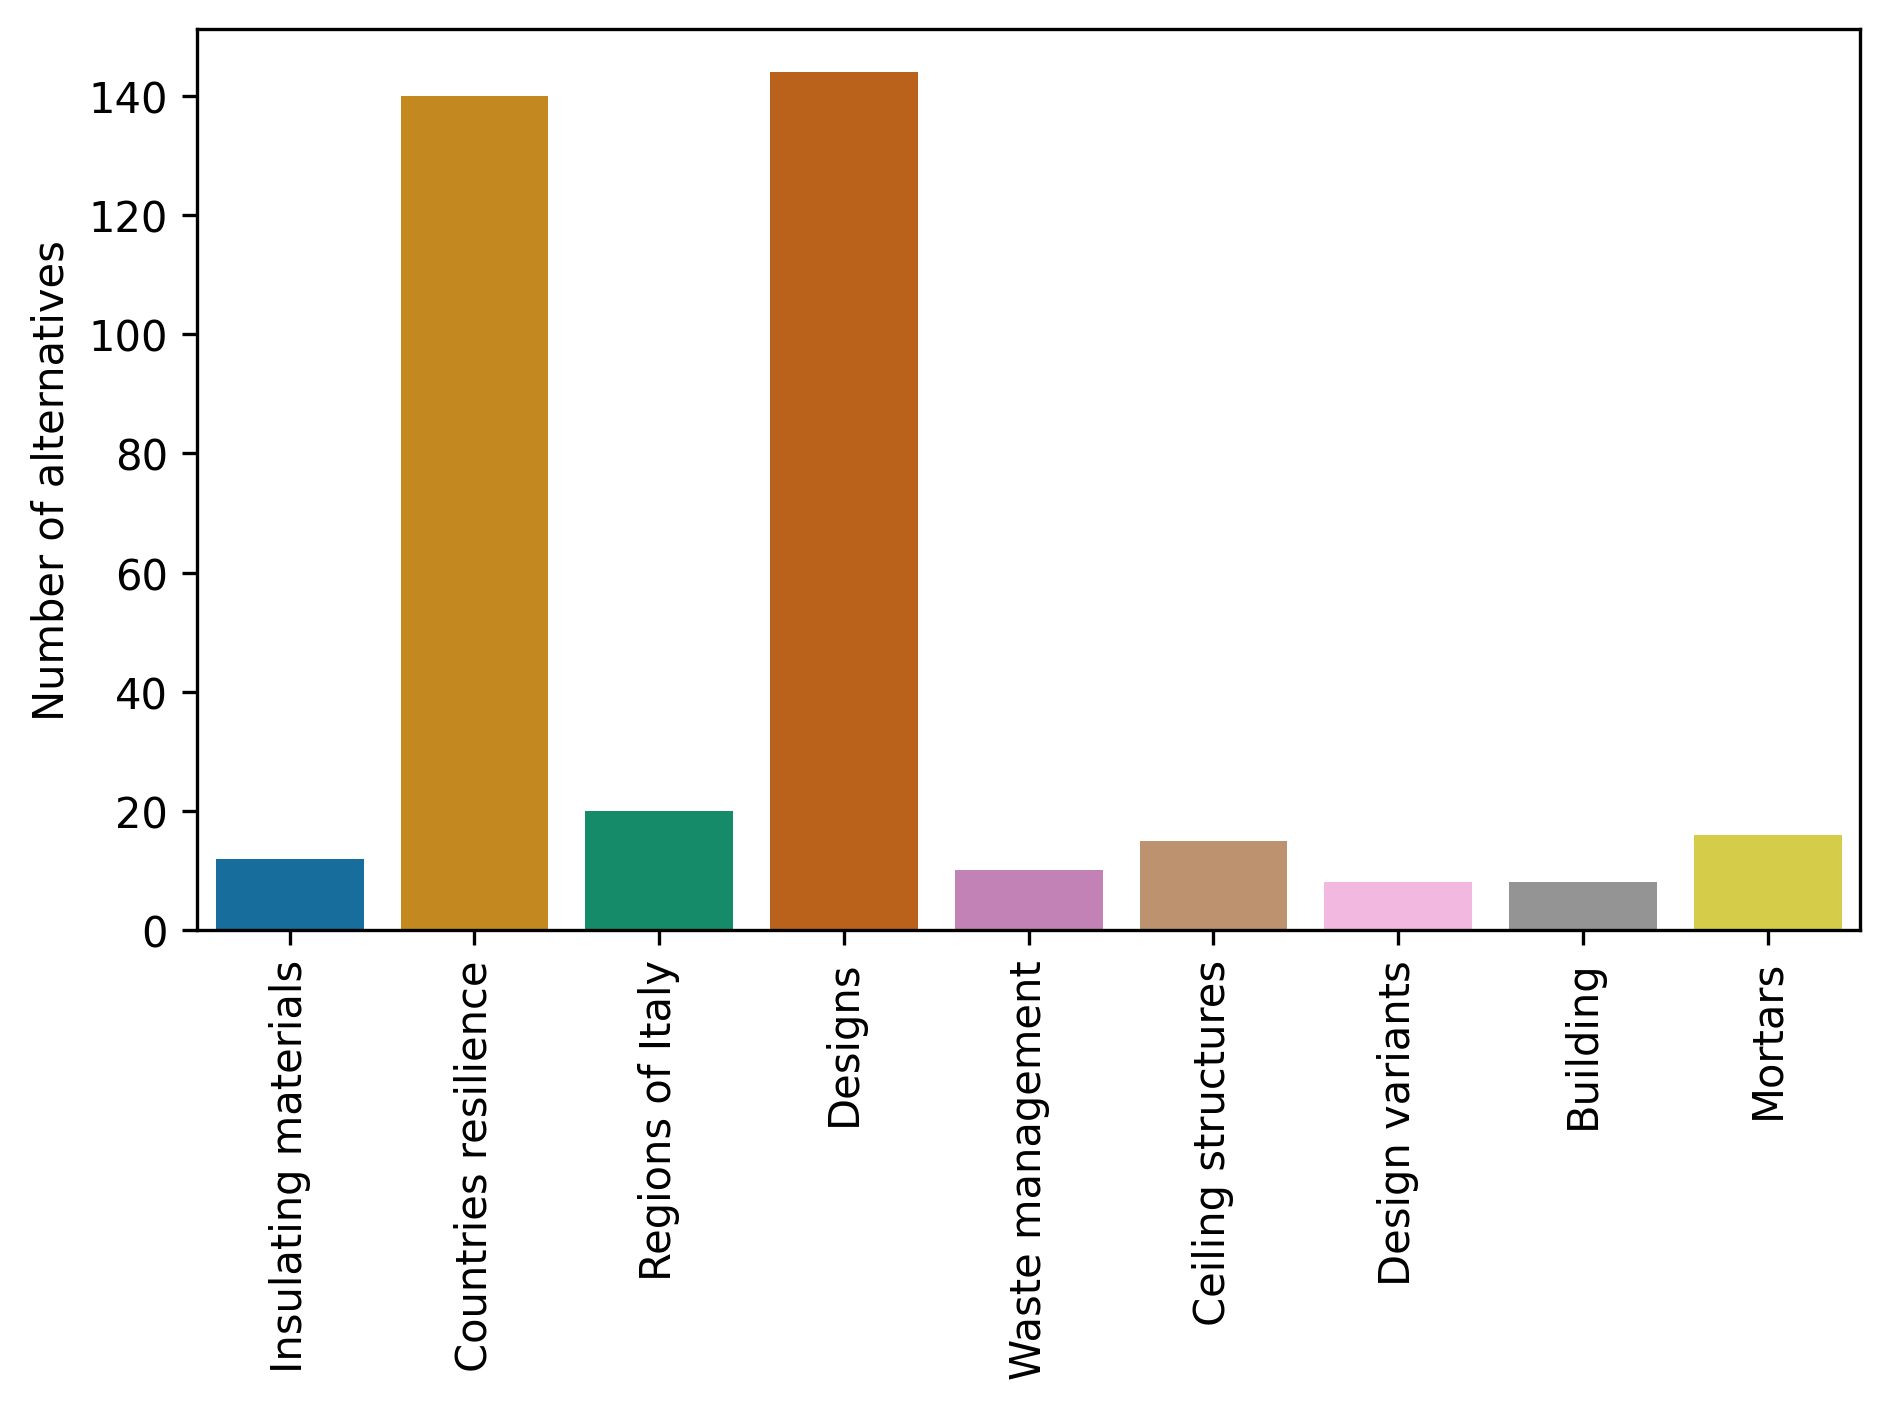

In [24]:
datasets = {
    "insulating-materials": "Insulating materials",
    "countries-resilience": "Countries resilience",
    "regions-italy": "Regions of Italy",
    "designs": "Designs",
    "waste-management": "Waste management",
    "ceiling-structures": "Ceiling structures",
    "design-variants": "Design variants",
    "building": "Building",
    "cement-mortars-geopolymers": "Mortars",
}

data = defaultdict(list)

for folder, name in datasets.items():
    dataset = MCDADataset.read_csv(f"../data/{folder}/dataset.csv")
    data["name"].append(name)
    data["alternatives"].append(len(dataset.data))

pd.DataFrame(data)


plt.figure(dpi=300)
sns.barplot(data, x="name", y="alternatives", palette="colorblind", hue="name", legend=False)
plt.xlabel("")
plt.ylabel("Number of alternatives")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../data/_miscellaneous/alternatives.png")
plt.show()

# Number of criteria

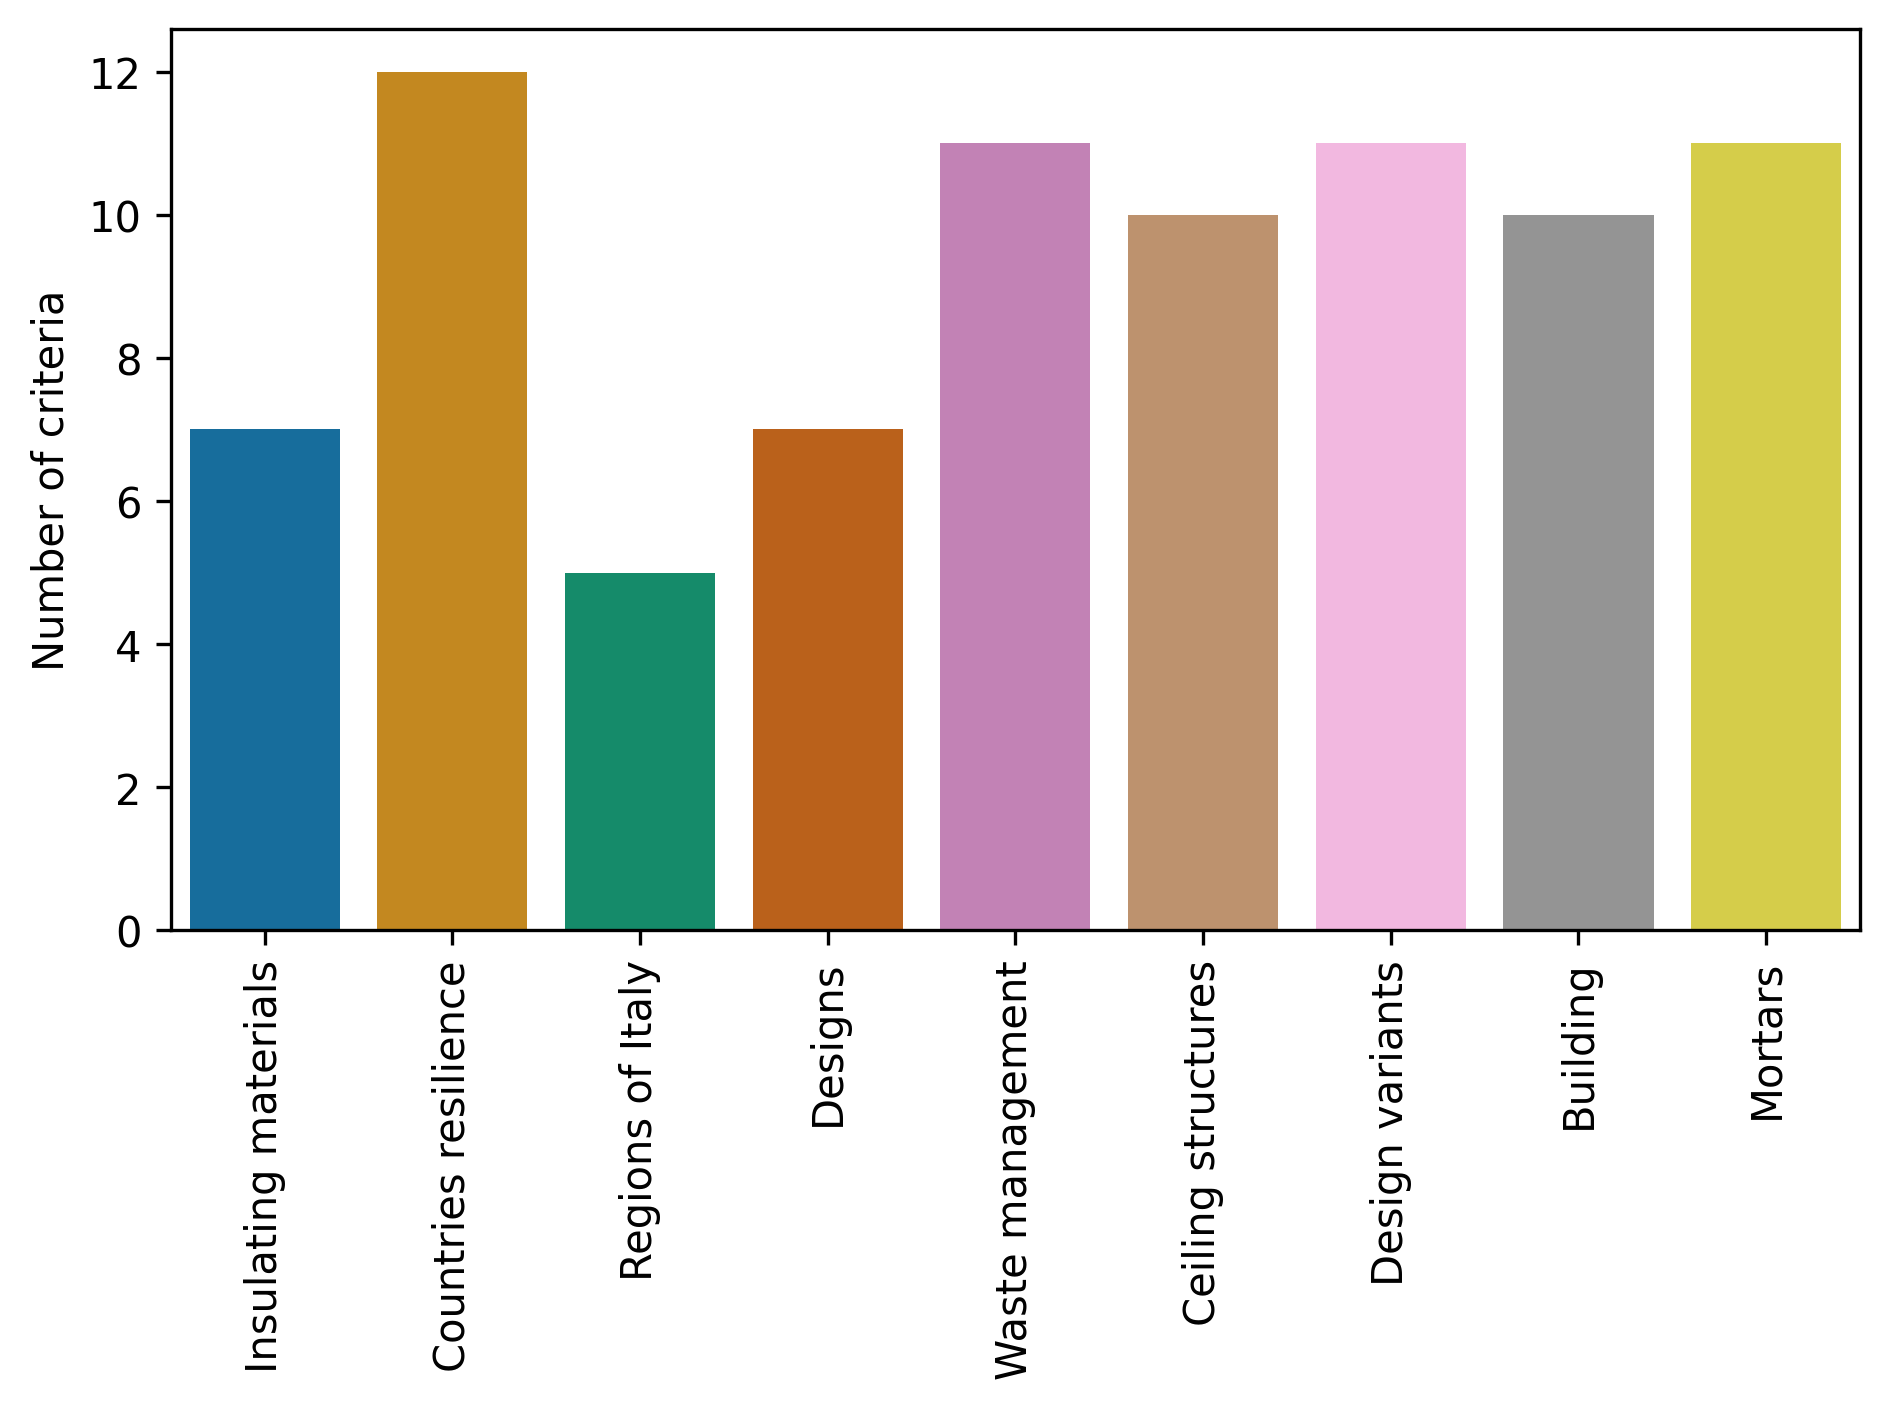

In [25]:
datasets = {
    "insulating-materials": "Insulating materials",
    "countries-resilience": "Countries resilience",
    "regions-italy": "Regions of Italy",
    "designs": "Designs",
    "waste-management": "Waste management",
    "ceiling-structures": "Ceiling structures",
    "design-variants": "Design variants",
    "building": "Building",
    "cement-mortars-geopolymers": "Mortars",
}

data = defaultdict(list)

for folder, name in datasets.items():
    dataset = MCDADataset.read_csv(f"../data/{folder}/dataset.csv")
    data["name"].append(name)
    data["criteria"].append(len(dataset.data.columns))

pd.DataFrame(data)


plt.figure(dpi=300)
sns.barplot(data, x="name", y="criteria", palette="colorblind", hue="name", legend=False)
plt.xlabel("")
plt.ylabel("Number of criteria")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../data/_miscellaneous/criteria.png")
plt.show()

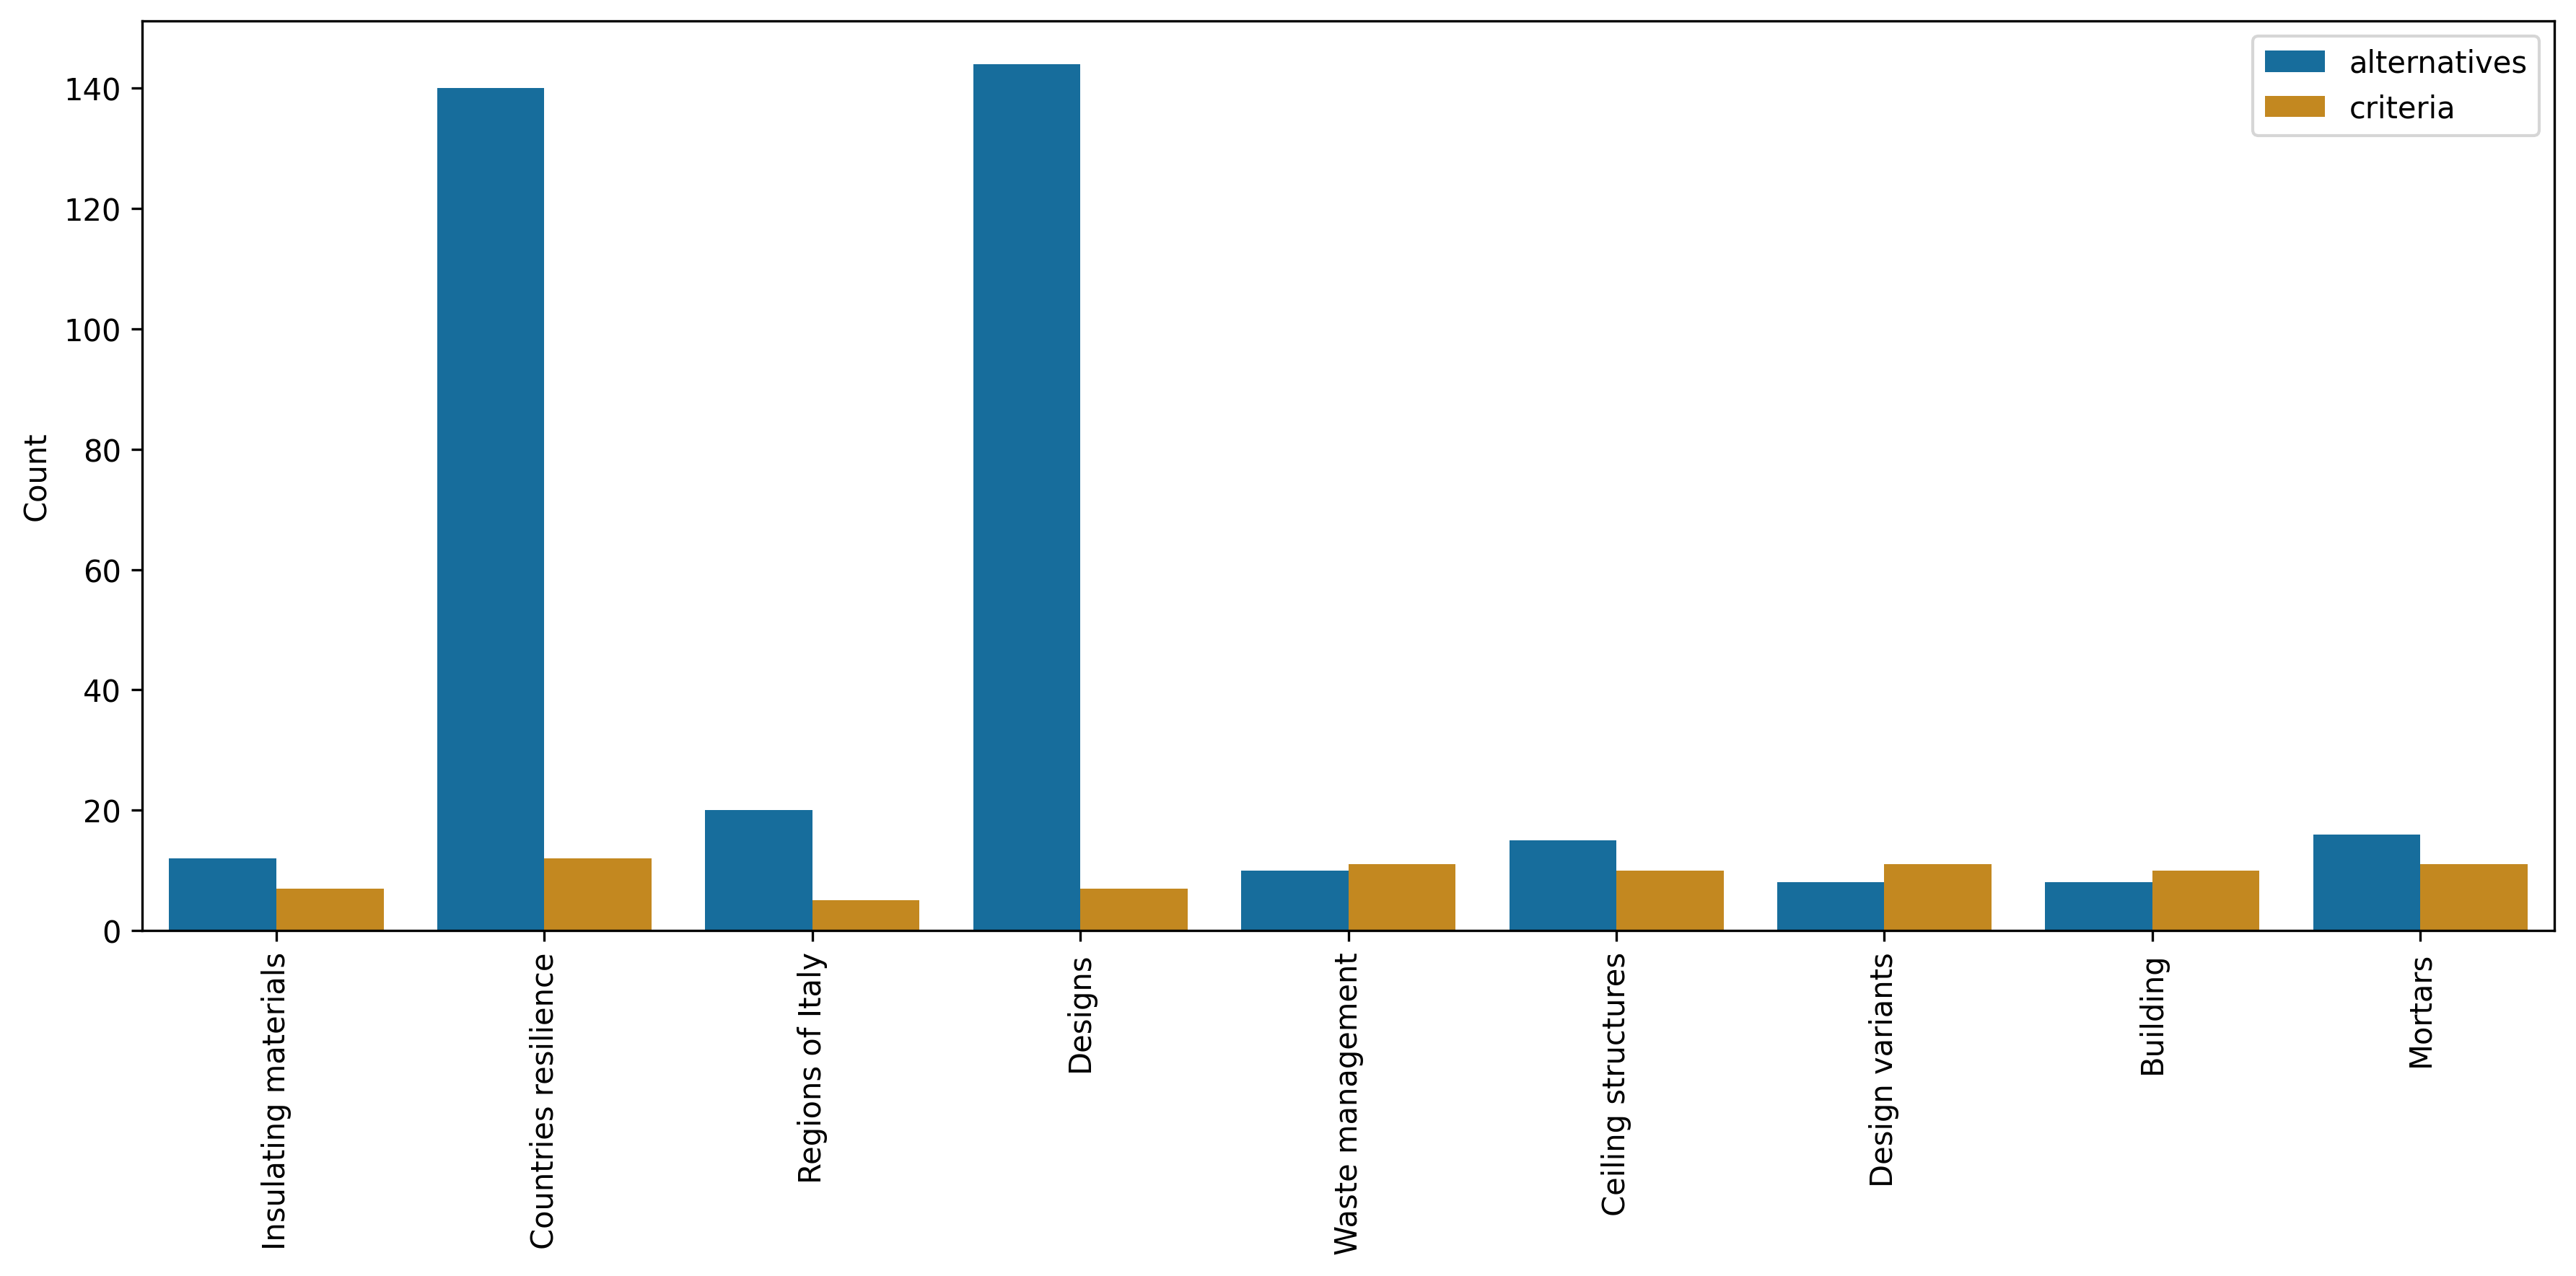

In [27]:
datasets = {
    "insulating-materials": "Insulating materials",
    "countries-resilience": "Countries resilience",
    "regions-italy": "Regions of Italy",
    "designs": "Designs",
    "waste-management": "Waste management",
    "ceiling-structures": "Ceiling structures",
    "design-variants": "Design variants",
    "building": "Building",
    "cement-mortars-geopolymers": "Mortars",
}

# Collect both alternatives and criteria data
data = defaultdict(list)
for folder, name in datasets.items():
    dataset = MCDADataset.read_csv(f"../data/{folder}/dataset.csv")
    data["name"].append(name)
    data["alternatives"].append(len(dataset.data))
    data["criteria"].append(len(dataset.data.columns))

df = pd.DataFrame(data)

# Melt the dataframe to have alternatives and criteria in one column
df_melted = df.melt(id_vars=['name'], 
                    value_vars=['alternatives', 'criteria'],
                    var_name='metric', 
                    value_name='count')

# Create the plot
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(data=df_melted, x="name", y="count", hue="metric", palette="colorblind")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig(f"../data/_miscellaneous/alternatives_criteria.png")
plt.show()